# Context

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

(To see more, follow this link https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

# Objective - Data Vizualisation

What are the factors allowing someone to have a second date ?

In [2]:
# Let's first import the usual libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
pd.options.display.max_rows = 1000 #handy for showing truncated results

In [3]:
pip install plotly==4.5.4

     |████████████████████████████████| 7.1MB 7.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [58]:
database = pd.read_csv("/content/speed_dating.csv", encoding = "ISO-8859-1")

In [6]:
# Let's have a first look at our dataset 
database.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,...,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,...,7.332191,0.780825,0.981631,0.376950,1.230615,0.934132,24.384524,16.588583,19.411346,16.233415,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837,25.610341,10.751267,11.524839,14.276783,9.207503,11.253802,24.970936,10.923285,11.952687,14.959108,9.526191,11.966270,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,...,1.521854,1.611694,1.382139,0.484683,1.294557,0.753902,13.712120,7.471537,6.124502,5.163777,5.900697,6.557041,17.551540,9.336288,7.880088,7.231325,6.100502,8.615985,17.477134,5.740351,6.004222,6.927869,6.385852,6.516178,17.007669,6.226283,7.010650,7.935509,6.403117,7.012067,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,4.000000,154.000000,0.000000,-0.020000,0.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.0000

In [7]:
database.shape

(8378, 195)

In [8]:
database.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


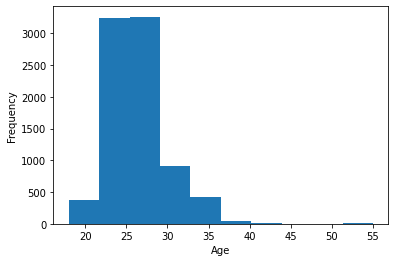

In [9]:
# Let's have a look at the age of the participants
age = database['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

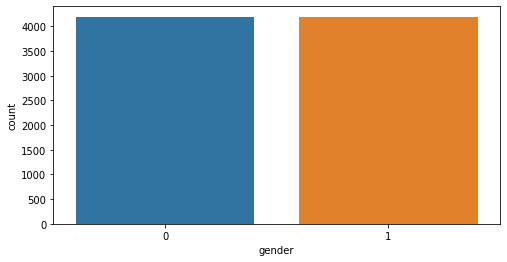

In [10]:
# Looking at the distribution by gender
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=database)

It appears that most people where aged between 20 to 30 years old and the number of men and women are equal.

In [11]:
# Let's have a look at the number of people who found a second date
match = pd.crosstab(index=database['match'], columns='count')
match_p =((match.values[1]/(match.values[1]+match.values[0]))*100).round(1)
print("It looks like only {} % found a second date".format(*match_p))

It looks like only 16.5 % found a second date


We have a lot of data, let's now have a look at the integrity of our dataset by checking out the number of missing values 

In [12]:
# Let's count the missing values by column
cols = database.columns
for col in cols:
    mis = database[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/database.shape[0] * 100, 3)))

id: 1 missing, 0.012%
positin1: 1846 missing, 22.034%
pid: 10 missing, 0.119%
int_corr: 158 missing, 1.886%
age_o: 104 missing, 1.241%
race_o: 73 missing, 0.871%
pf_o_att: 89 missing, 1.062%
pf_o_sin: 89 missing, 1.062%
pf_o_int: 89 missing, 1.062%
pf_o_fun: 98 missing, 1.17%
pf_o_amb: 107 missing, 1.277%
pf_o_sha: 129 missing, 1.54%
attr_o: 212 missing, 2.53%
sinc_o: 287 missing, 3.426%
intel_o: 306 missing, 3.652%
fun_o: 360 missing, 4.297%
amb_o: 722 missing, 8.618%
shar_o: 1076 missing, 12.843%
like_o: 250 missing, 2.984%
prob_o: 318 missing, 3.796%
met_o: 385 missing, 4.595%
age: 95 missing, 1.134%
field: 63 missing, 0.752%
field_cd: 82 missing, 0.979%
undergra: 3464 missing, 41.346%
mn_sat: 5245 missing, 62.604%
tuition: 4795 missing, 57.233%
race: 63 missing, 0.752%
imprace: 79 missing, 0.943%
imprelig: 79 missing, 0.943%
from: 79 missing, 0.943%
zipcode: 1064 missing, 12.7%
income: 4099 missing, 48.926%
goal: 79 missing, 0.943%
date: 97 missing, 1.158%
go_out: 79 missing, 0.943

We have a lot of missin values, let's have a look at how we are going to handle them

As we can observe, we have a lot of missing values. 
There are different methods that allows us to handle missing values :
- Delete the rows/columns with missing values
- Imputing with the mean or median
- Using algorithm optimised for dealing with missing values

In our case since we just want to do some analysis, we are going to drop columns

The first step will be to drop columns where more than 10% of values are missing

In [13]:
to_drop = []
tmp = [col for col in database.columns 
       if database[col].isnull().sum()/database.shape[0] * 100 > 10] # Taking all the columns where the ratio of missing values is superior to 25%
to_drop += tmp

In [14]:
print(f"Original shape: {database.shape}")
print(f"Dropping {len(to_drop)} columns")

Original shape: (8378, 195)
Dropping 108 columns


In [15]:
# Dropping the columns
for col in to_drop:
    del database[col]
    
print(f"New shape: {database.shape}")

New shape: (8378, 87)


In [16]:
len(database.columns)

87

In [17]:
#Let's have a look at our dataset
cols = database.columns
for col in cols:
    mis = database[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/database.shape[0] * 100, 3)))

id: 1 missing, 0.012%
pid: 10 missing, 0.119%
int_corr: 158 missing, 1.886%
age_o: 104 missing, 1.241%
race_o: 73 missing, 0.871%
pf_o_att: 89 missing, 1.062%
pf_o_sin: 89 missing, 1.062%
pf_o_int: 89 missing, 1.062%
pf_o_fun: 98 missing, 1.17%
pf_o_amb: 107 missing, 1.277%
pf_o_sha: 129 missing, 1.54%
attr_o: 212 missing, 2.53%
sinc_o: 287 missing, 3.426%
intel_o: 306 missing, 3.652%
fun_o: 360 missing, 4.297%
amb_o: 722 missing, 8.618%
like_o: 250 missing, 2.984%
prob_o: 318 missing, 3.796%
met_o: 385 missing, 4.595%
age: 95 missing, 1.134%
field: 63 missing, 0.752%
field_cd: 82 missing, 0.979%
race: 63 missing, 0.752%
imprace: 79 missing, 0.943%
imprelig: 79 missing, 0.943%
from: 79 missing, 0.943%
goal: 79 missing, 0.943%
date: 97 missing, 1.158%
go_out: 79 missing, 0.943%
career: 89 missing, 1.062%
career_c: 138 missing, 1.647%
sports: 79 missing, 0.943%
tvsports: 79 missing, 0.943%
exercise: 79 missing, 0.943%
dining: 79 missing, 0.943%
museums: 79 missing, 0.943%
art: 79 missing

In [18]:
# narrowing dataset
dating_1 = database.iloc[:, 11:28]
dating_2 = database.iloc[:, 30:35]
dating_3 = database.iloc[:, 39:43]
dating_4 = database.iloc[:, 45:67]
dating_5 = database.iloc[:, 69:74]
dating_6 = database.iloc[:, 87:91]
dating_7 = database.iloc[:, 97:102]
dating_8 = database.iloc[:, 104:107]

data = pd.concat([database.iloc[:, 0],database.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [19]:
# Now that we have reduced the number of missing values to hundreds, we are going to remove null rows
data2 = data.dropna()
data2.shape

(7054, 55)

In [20]:
# Check the datatypes to have further information about the dataset
data2.dtypes

iid           int64
gender        int64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
met_o       float64
age         float64
field        object
field_cd    float64
race        float64
date        float64
go_out      float64
career       object
career_c    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64
exphappy    float64
attr1_1     float64
sinc1_1     float64
intel1_1    float64
fun1_1      float64
amb1_1      float64
shar1_1     float64


In [21]:
# Let's create a dataset without object in order to use some further method analysis
data_free_o = data2.drop(['field', 'career'], axis = 1)
data_free_o.shape

(7054, 53)

We are going to have a look to the correlation between the different columns by using a heatmap

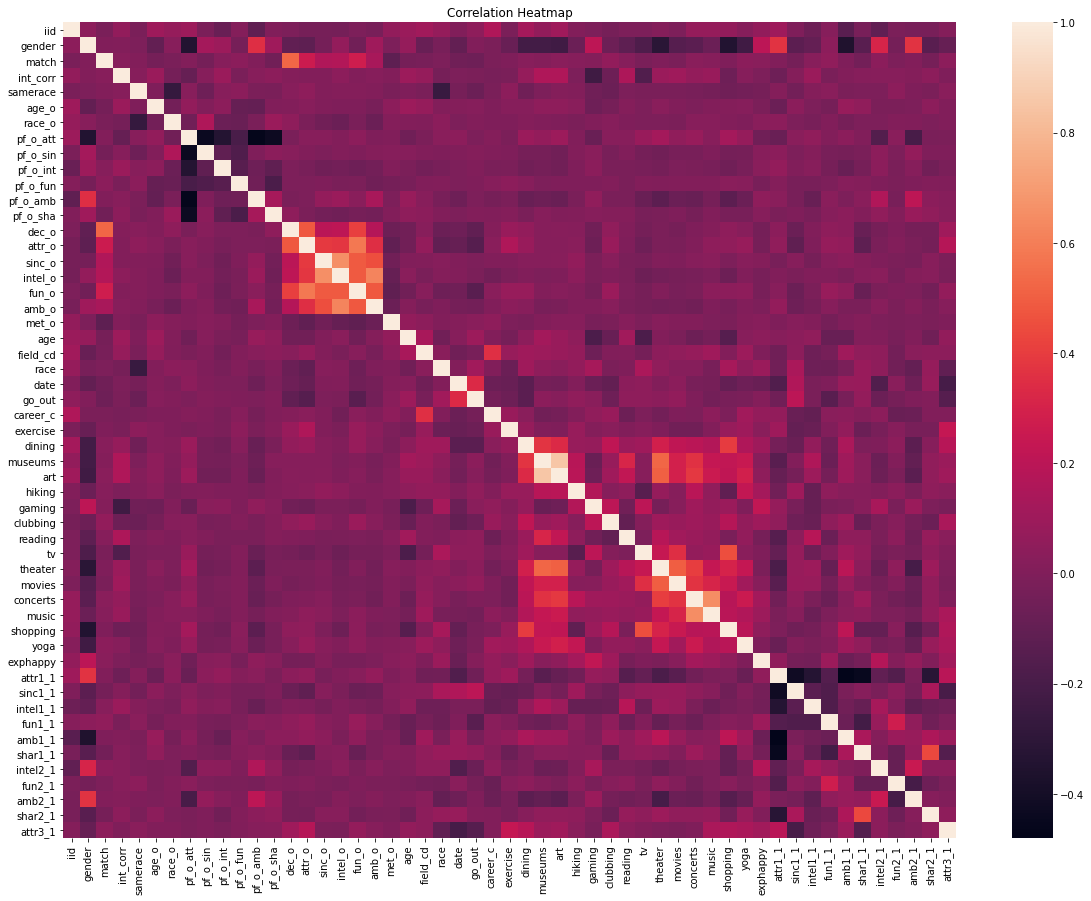

In [25]:
# Heatmap creation
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title('Correlation Heatmap')
corr = data_free_o.corr()
max_corr = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can observe that activities doesn"t influence much the variable match. But in the other hand, the variable regarding the partner's attribute and their decisions is highly correlated to the match variable.
We can then remove the interests as it doesnt influence the match variable.

In [23]:
activities_interested=['exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = data_free_o.groupby(['gender']).mean()[activities_interested].values

In [24]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities[0,:],
    name='Women',
    #orientation = 'h',
    marker=dict(
        color='pink'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities[1,:],
    name='Men',
    #orientation = 'h',
    marker=dict(
        color='darkblue'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Interest by activities Men vs Women',
    font=dict(
        size=16
    ),
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

If you want to take someone on a date, they are more likely to have a good time if you chose to go see a movie or for a dinner or maybe both. Even thought it doesnt allow to secure a second date, it is always interesting to see what we can get from those informations.

In [26]:

data_no_i =  data_free_o.drop([ 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [27]:
diff_gender = data_no_i.gender.apply(lambda x: 
                                       "Female" if x==0 
                                       else "Male"
                                   )
                                      

gender = diff_gender.value_counts()
gender

Female    3539
Male      3515
Name: gender, dtype: int64

In [37]:
is_woman = data_no_i["gender"]==0
df_woman = data_no_i[is_woman]


In [38]:
is_man = data_no_i["gender"]==1
df_man = data_no_i[is_man]


In [39]:
round_second = df_man.dec_o.apply(lambda x: 
                                            "NO" if x==0 
                                            else "YES")

matches = round_second.value_counts()


like = df_woman.dec_o.apply(lambda x: 
                                            "NO" if x==0 
                                            else "YES")

likes = like.value_counts()


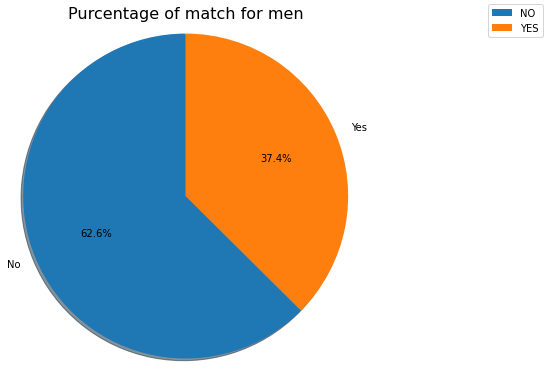

In [40]:
# Looking at the distribution of if men got a second date or not

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)

fig.suptitle('Purcentage of match for men', fontsize=16)

ax.pie(matches, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1.5,
       labels = ["No", "Yes"]
       )

fig.legend(matches.index)

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.



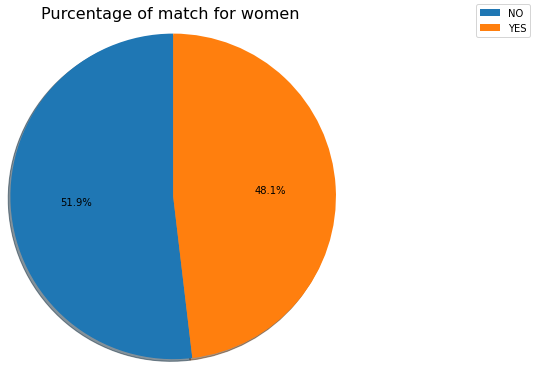

In [41]:
# Création du pie chart femme

fig1, ax1 = plt.subplots(figsize=(10,5), constrained_layout=True)

fig1.suptitle('Purcentage of match for women ', fontsize=16)
ax1.pie(likes, 
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1.5,
       )

fig1.legend(likes.index, loc="best")


plt.show()

Usually woman tend to be more selective than men as we have seen that woman have more chance to get a second date from a man than the other way around.

In [42]:
races = data_no_i.race.apply(lambda x: 
                                 "African American" if x==1.0
                                 else "European" if x==2.0
                                 else "Latino" if x==3.0
                                 else "Asian" if x==4.0
                                 else "Native American" if x==5.0
                                 else "Other")

count_races = races.value_counts()
count_races


European            3960
Asian               1701
Latino               568
Other                459
African American     366
Name: race, dtype: int64

<BarContainer object of 5 artists>

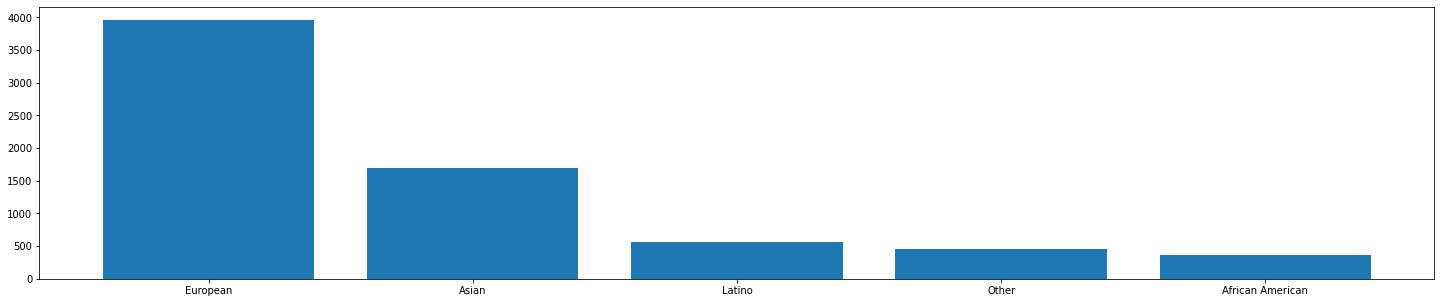

In [44]:
plt.figure(figsize=(25,5))
plt.bar(count_races.index, count_races.values)


In [45]:
# Getting the 6 variables in order to compare them
atributes_gender = data_no_i[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols


In [47]:
# Creating the first graph
trace1 = go.Bar(
    y=list(atributes_gender.iloc[1]),
    x=atributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='darkblue'
    )
)
# Creating the second graph
trace2 = go.Bar(
    y=list(atributes_gender.iloc[0]),
    x=atributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='pink'
    )
)

# Creating the double graph
data = [trace1, trace2]
layout = go.Layout(
    title='What people are looking into the opposite sex',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

We know that men prefers an attractive partner whereas woman tend to prefer an all around men.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



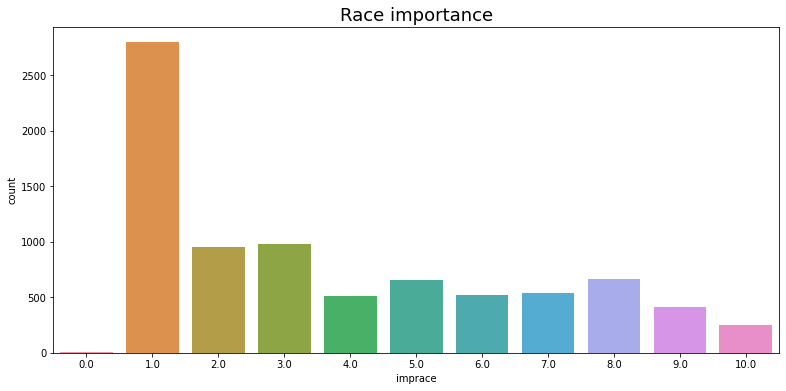

In [49]:
plt.figure(figsize=(13,6))
plt.title("Race importance", fontsize=18)
sns.countplot(database['imprace'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



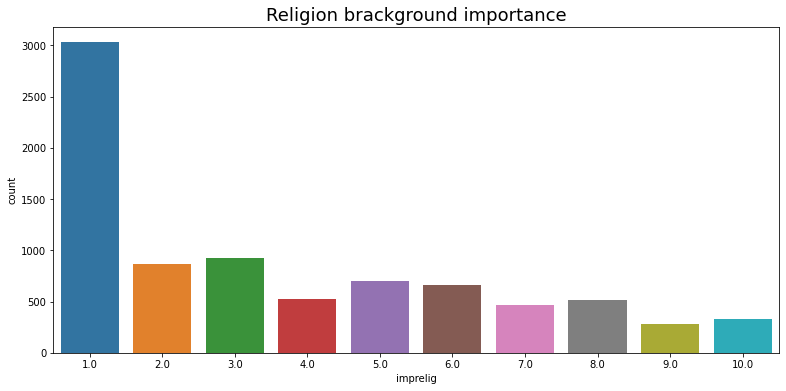

In [48]:
plt.figure(figsize=(13,6))
plt.title('Religion brackground importance', fontsize=18)
sns.countplot(database['imprelig'])

Those two precedents graphs shows us that love knows no discrimination regarding religion and ethnicity which is a good point.

In [59]:
# Most of Women know that men's are looking for attractive a woman
# Now let's take a look in what people think about themselves vs How they think other people see them
own_rating = database[['attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].mean()
others_rating = database[['attr5_1', 'sinc5_1','intel5_1','fun5_1','amb5_1']].mean()

In [60]:
trace1 = go.Bar(
    y=list(own_rating),
    x=cols[:-1],
    name='SELF',
    marker=dict(
        color='lightblue'
    )
)
trace2 = go.Bar(
    y=list(others_rating),
    x=cols[:-1],
    name='OTHERS',
    marker=dict(
        color='darkgrey'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Self-evaluation',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')

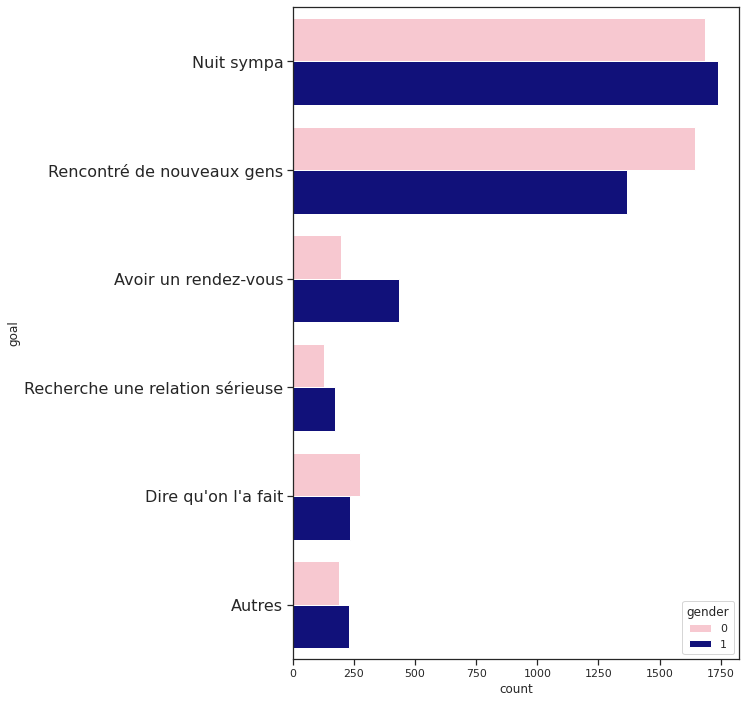

In [173]:
# Goal seeken for the night
goals = ['Spend good time','Meet new people','get a date'
        ,'Find a relationship',"just to try",'other']
plt.figure(figsize=(8,12))
sn = sns.countplot(y='goal',data=database, hue='gender', palette=['pink','darkblue'])
sn.set(yticklabels=goals)
sn.set
sn = plt.yticks(rotation=0,fontsize=16)

Men are more likely to look for a date than woman but people in general just want to have fun and to spend a good evening. 

Results: 
- Woman are more likely to get a second date than men maybe because woman are more selective
- Men prefer attractive partners whereas woman prefer an all around men
- If you want to increase your odds to spen a good night, you should go see a movie or go for a dinner
- There is no traits that make you more likeable so just be yourself
- The perception that you have of yourself is often right
- You shoul aim to spend a good night instead of looking for a date if you dont want to be disapointed